In [56]:
from PIL import Image
import numpy
import matplotlib.pyplot as plt
import random

In [57]:
#Tile setings
name_image = "data/Maze.png"
first_image = Image.open(name_image)
scale = 10
step_im = 3
lpr = 0
tpb = 0

#New image setings
name = "NewImage{}.png"
size = [50, 50] # y, x
startpix = (step_im // 2, size[0] - (step_im + 1) // 2) # y, x
old_map_start = [0, first_image.size[1] - step_im]

In [58]:
def indexTile(np_array1,
               np_array2):
    return list((np_array1 == np_array2).all(-1).all(-1).all(-1)).index(True)

def next_index(index, max_index, step):
    if index + step == max_index:
        return 0
    elif index + step < 0:
        return max_index - 1
    else:
        return index + step

def step4(index_x, index_y,
          max_index_x, max_index_y):
    left_step = next_index(index_x, max_index_x, -1)
    right_step = next_index(index_x, max_index_x, 1)
    bottom_step = next_index(index_y, max_index_y, 1)
    top_step = next_index(index_y, max_index_y, -1)
    
    return ((left_step, index_y),
            (right_step, index_y),
            (index_x, bottom_step),
            (index_x, top_step))

def 

SyntaxError: invalid syntax (<ipython-input-58-8c33698732b8>, line 25)

In [59]:
class TileCouple:
    def __init__(self, tiles):
        self.tiles = tiles
        self.tile_count = len(tiles)
        self.tile_couple = {}
    
    def search(self,
               left_tile = [-1],
               right_tile = [-1],
               bottom_tile = [-1],
               top_tile = [-1]):
        if (left_tile, right_tile, bottom_tile, top_tile) in self.tile_couple:
            return self.tile_couple[(left_tile,
                                     right_tile,
                                     bottom_tile,
                                     top_tile)]
        else:
            return self.append(left_tile,
                               right_tile,
                               bottom_tile,
                               top_tile)
    
    def append(self,
               left_tile = -1,
               right_tile = -1,
               bottom_tile = -1,
               top_tile = -1):
        mask_image = numpy.zeros(self.tiles.shape[1:], int)
        patern_image = numpy.zeros(self.tiles.shape[1:], int)
        index_conect = []
        for i in range(mask_image.shape[0]):
            for i2 in range(mask_image.shape[0]):
                if left_tile != -1 and i2 < (mask_image.shape[0] + 1) // 2:
                    mask_image[i, i2] = [1, 1, 1]
                    patern_image[i, i2] = self.tiles[left_tile, i, i2 + 1]
                if right_tile != -1 and i2 >= mask_image.shape[0] // 2:
                    mask_image[i, i2] = [1, 1, 1]
                    patern_image[i, i2] = self.tiles[right_tile, i, i2 - 1]
                if bottom_tile != -1 and i >= mask_image.shape[0] // 2:
                    mask_image[i, i2] = [1, 1, 1]
                    patern_image[i, i2] = self.tiles[bottom_tile, i - 1, i2]
                if top_tile != -1 and i < (mask_image.shape[0] + 1) // 2:
                    mask_image[i, i2] = [1, 1, 1]
                    patern_image[i, i2] = self.tiles[top_tile, i + 1, i2]
        accept_index = (self.tiles * mask_image == patern_image).all(-1).all(-1).all(-1)
        for i in range(self.tile_count):
            if accept_index[i]:
                index_conect.append(i)
        if len(index_conect) == self.tile_count:
            index_conect = [-1]
        self.tile_couple[(left_tile,
                          right_tile,
                          bottom_tile,
                          top_tile)] = index_conect
        return index_conect

In [60]:
class Tile:
    def __init__(self):
        self.tile = []
        self.tile_couple = []
        self.tile.append(-1)
        self.tile_couple.append([[0]])
    
    def append(self, tile_set,
               left_tile= -1,
               right_tile= -1,
               bottom_tile= -1,
               top_tile= -1):
        pass

(16, 16)


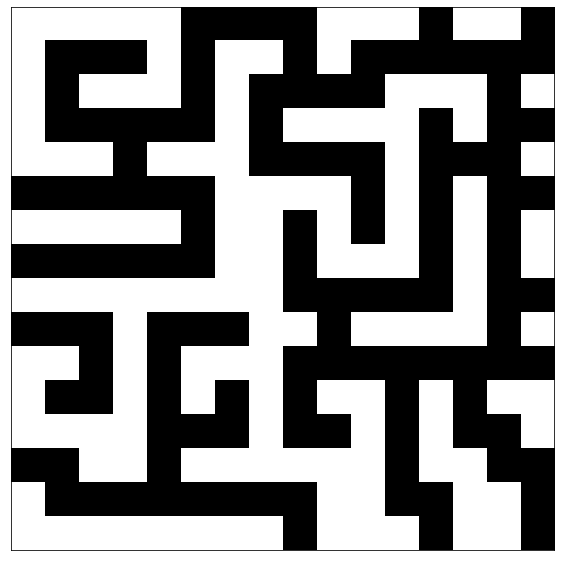

In [61]:
plt.figure(figsize=(scale, scale))
for i in range(1):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(first_image)
print(first_image.size)

In [62]:
mass_crop_periods = numpy.array([0] ,int)
mass_crop = numpy.dtype(int)

for i in range(first_image.size[1] - (step_im - 1) * tpb):
    for i2 in range(first_image.size[0] - (step_im - 1) * lpr):
        crop_im = first_image.crop((i2, i, (i2 + step_im), (i + step_im)))
        im_array = numpy.array(crop_im, dtype=int)[:, :, 0:3]
        # first part
        if mass_crop is numpy.dtype(int):
            mass_crop = numpy.array([im_array])
        
        # left + right
        if i2 + step_im > first_image.size[0]:
            mask_lp = numpy.zeros((step_im, first_image.size[0] - i2, 3) ,int)
            crop_im = first_image.crop((0, i, i2 + step_im - first_image.size[0], (i + step_im)))
            mask_lp = numpy.append(mask_lp, numpy.array(crop_im, dtype=int)[:, :, 0:3], 1)
            im_array += mask_lp
        # top + bottom
        if i + step_im > first_image.size[1]:
            mask_tp = numpy.zeros((first_image.size[1] - i, step_im , 3) ,int)
            crop_im = first_image.crop((i2, 0, (i2 + step_im), i + step_im - first_image.size[1]))
            mask_tp = numpy.append(mask_tp, numpy.array(crop_im, dtype=int)[:, :, 0:3], 0)
            im_array += mask_tp
        # t+b & l+r
        if i + step_im > first_image.size[1] and i2 + step_im > first_image.size[0]:
            mask_lp = numpy.zeros((i + step_im - first_image.size[1], first_image.size[0] - i2, 3) ,int)
            mask_tp = numpy.zeros((first_image.size[1] - i, step_im , 3) ,int)
            crop_im = first_image.crop((0, 0, i2 + step_im - first_image.size[0], i + step_im - first_image.size[1]))
            mask_lp = numpy.append(mask_lp, numpy.array(crop_im, dtype=int)[:, :, 0:3], 1)
            mask_tp = numpy.append(mask_tp, mask_lp, 0)
            im_array += mask_tp
        
        # 0%
        if not (mass_crop == im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[indexTile(mass_crop, im_array)] += 1
        # flip          
        flip_im_array = numpy.flip(im_array, 0)
        if not (mass_crop == flip_im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [flip_im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[indexTile(mass_crop, flip_im_array)] += 1
        # 90%
        im_array = numpy.rot90(im_array)
        if not (mass_crop == im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[indexTile(mass_crop, im_array)] += 1
        # flip
        flip_im_array = numpy.flip(im_array, 0)
        if not (mass_crop == flip_im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [flip_im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[indexTile(mass_crop, flip_im_array)] += 1
        # 180%
        im_array = numpy.rot90(im_array)
        if not (mass_crop == im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[indexTile(mass_crop, im_array)] += 1
        # flip
        flip_im_array = numpy.flip(im_array, 0)
        if not (mass_crop == flip_im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [flip_im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[indexTile(mass_crop, flip_im_array)] += 1
        # 270%
        im_array = numpy.rot90(im_array)
        if not (mass_crop == im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[indexTile(mass_crop, im_array)] += 1
        # flip
        flip_im_array = numpy.flip(im_array, 0)
        if not (mass_crop == flip_im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [flip_im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[indexTile(mass_crop, flip_im_array)] += 1

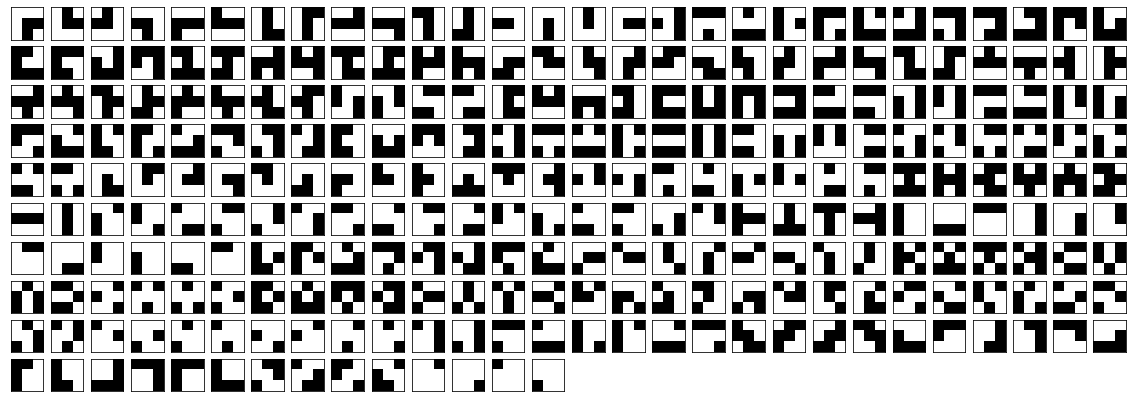

In [63]:
plt.figure(figsize=(2*scale, 2*scale))
for i in range(28*28):
    if i == len(mass_crop):
        break
    plt.subplot(28, 28, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mass_crop[i])

In [64]:
new_image_array = numpy.zeros((size[0], size[1], 3), int)
crop_im = first_image.crop((old_map_start[0], old_map_start[1], old_map_start[0] + step_im, old_map_start[1] + step_im))
im_array = numpy.array(crop_im, dtype=int)[:, :, 0:3]
index_tile = indexTile(mass_crop, im_array)


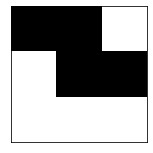

In [65]:
plt.figure(figsize=(scale/4, scale/4))
for i in range(1):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(im_array)

In [66]:
mytile = TileCouple(mass_crop)

In [ ]:
point_array = [[[] for i in range(size[0])] for i2 in range(size[1])]
point_array[startpix[0]][startpix[1]] = [index_tile]

i = 0
steck_new = []
steck_prew = [startpix]

while i < size[0] * size[1]:
    step_iteration = steck_prew.pop()
    new_steps = step4(step_iteration[0], step_iteration[1],
                    size[0], size[1])
    area_tile = []
    for i2 in new_steps:
        if point_array[i2[0]][i2[1]] == [] and i2 not in steck_new:
            steck_new.append(i2)
            area_tile.append([-1])
        elif point_array[i2[0]][i2[1]] == []:
            area_tile.append([-1])
        else:
            area_tile.append(point_array[i2[0]][i2[1]])
    tile_can_be = set()
    

    print ("\r",
           len(area_tile[0]) * len(area_tile[1]) * len(area_tile[2]) * len(area_tile[3]),
           (i * 100) // 2550, " %", end="")

    if point_array[step_iteration[0]][step_iteration[1]] == []:
        for i2 in area_tile[0]:
            for i3 in area_tile[1]:
                for i4 in area_tile[2]:
                    for i5 in area_tile[3]:
                        for i6 in mytile.search(i2, i3, i4, i5):
                            tile_can_be.add(i6)
        if len(tile_can_be) == len(mass_crop):
            point_array[step_iteration[0]][step_iteration[1]] = [-1]
        else:
            point_array[step_iteration[0]][step_iteration[1]] = list(tile_can_be)
    if len(steck_prew) == 0:
        steck_prew = steck_new
        steck_new = []
    i += 1

 48384 1  %

In [54]:
# Painting
for i in range(size[0]):
    for i2 in range(size[1]):
        sum_color = 0
        for i3 in point_array[i][i2]:
            sum_color += mass_crop[i3,1,1]
        sum_color //= len(point_array[i][i2])
        new_image_array[i2,i] = sum_color

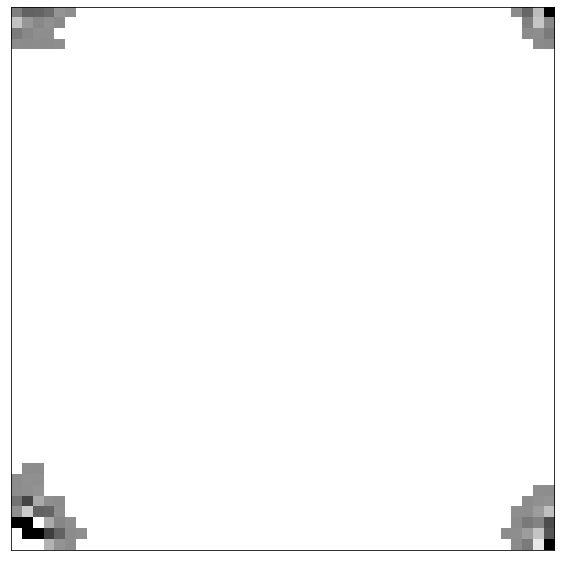

In [55]:
plt.figure(figsize=(scale, scale))
plt.xticks([])
plt.yticks([])
plt.imshow(new_image_array)